# Kunskapskontroll Deep Learning - Matilda Wilhelmsson DS23
# Classifier Emotion

### Abstract
In the code below I create a CNN used to classify emotions in photographs of people.
The model ended up have a validation accuracy of 49%.
The model will be used as an emotion classifier in a camera module.

### References
The following code was borrowed from the link below. 
I have made adaptions and extensions to the original code.
https://github.com/akmadan/Emotion_Detection_CNN.git

### Importing necessary libraries and looking at the data

In [12]:
# First I start with importing all necessary libraries so I can execute our code without errors.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model, Sequential, save_model, load_model
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Here I check for any GPUs available on the computer to make sure I can process the code fast enough.
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Displaying Images

In [13]:
# I load the dataset that we will use to train the model.
picture_size = 48
folder_path = "C:/Users/Matil/ec_utbildning/ds23_deep_learning/Emotion_Detection_CNN-main/images/"

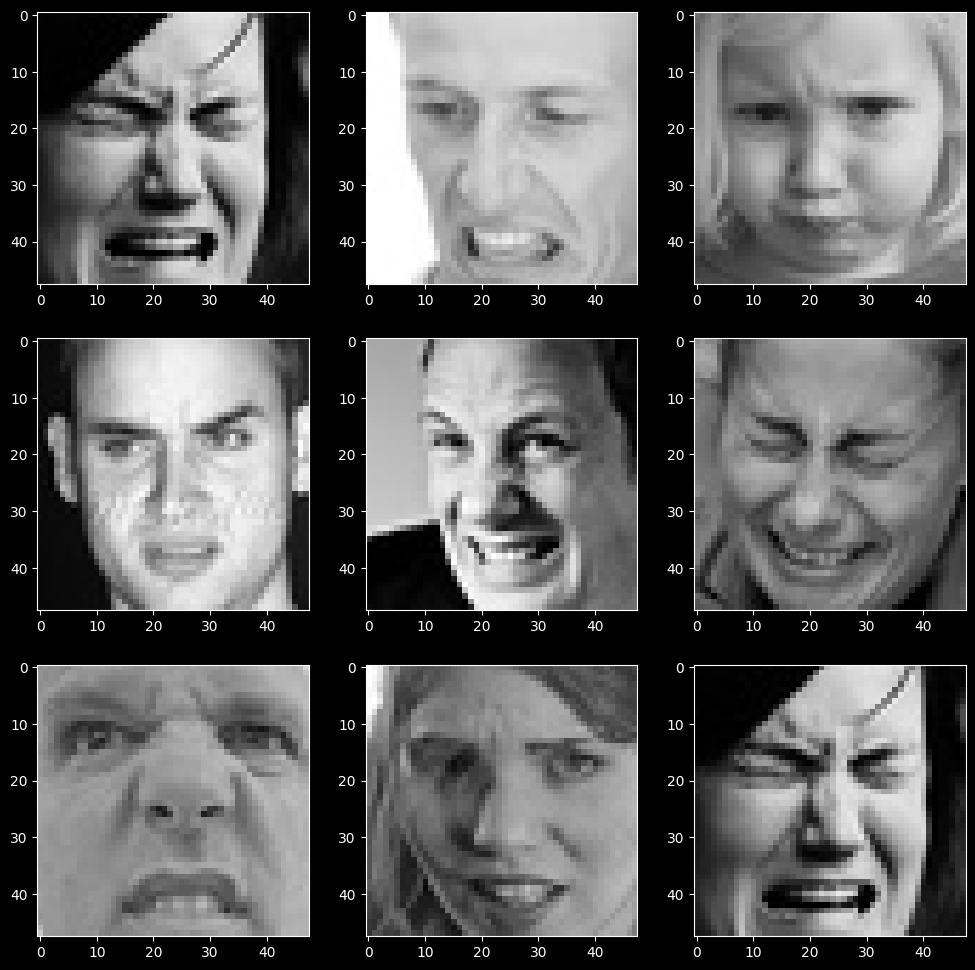

In [14]:
# I take a look a 9 different photos in the dataset that shows the emotion 'disgust'.
# This helps me get a feel for the dataset and make sure its classified correctly and can be used to train my model.
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [15]:
# We specify the batch_size to be 128. This is a hyperparameter that has been tuned to find the best size.
batch_size  = 128

# We normalize the pixels values in the trainingset and testset(ranging from 0 to 255 so that it instead ranges from 0 to 1).
# This helps with computing and training the model.
# I do some data augumentation that allows for the pictures in the trainingset to be altered.
# This increases variety which makes the model better at predicting new pictures.
datagen_train  = ImageDataGenerator(rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

datagen_val = ImageDataGenerator(rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

# I load the correct data into the trainingset and testset respectively so that it can be used in the model.
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [16]:
# We create a Convolutional neural network consisting of:
# 4 convolutional layers with pooling to identify patterns in the pictures
# dropuout instances are added in order to reduce the interdependency between neurons
# 1 flatten layer to reshape the data for the output layer
# 1 dense layer
# 1 dense output-layer 

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

no_of_classes = 7
model.add(Dense(no_of_classes, activation='softmax'))


# We compile the model using the adam-optimizer, loss as the categorical_crossentropy(because we are expecting several classes as output) and metrics as accuracy.
# With loss and metrics we can follow the training process and analyse how the model is performing.
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

# We print out the model summary to get an overview of the model we created.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

c:\Users\Matil\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Fitting the Model with Training and Validation Data 

In [17]:
# We instantiate EarlyStopping to make sure the model stops training after finding the best parameters.
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

# We instantiate learning_rate_reduction that makes sure we slow down learning rate when the validation accuracy slows down improving.
# We do this because we want to settle on the best parameter values.
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

# We set the number of epochs to 48. This is a hyperparameter that has been tuned to find an optimal value.
epochs = 48

In [19]:
# We start training the model on the trainingset and at the end of every epoch we validate the perfomance with the testset.
history = model.fit(train_set,
                epochs=epochs,
                validation_data = test_set,
                callbacks=callbacks_list
                )

Epoch 1/48
226/226 [==============================] - 531s 2s/step - loss: 1.9542 - accuracy: 0.2220 - val_loss: 1.8844 - val_accuracy: 0.2583 - lr: 0.0010
Epoch 2/48
226/226 [==============================] - 38s 165ms/step - loss: 1.8049 - accuracy: 0.2666 - val_loss: 1.9577 - val_accuracy: 0.2652 - lr: 0.0010
Epoch 3/48
226/226 [==============================] - 35s 153ms/step - loss: 1.6843 - accuracy: 0.3290 - val_loss: 1.7129 - val_accuracy: 0.3254 - lr: 0.0010
Epoch 4/48
226/226 [==============================] - 34s 151ms/step - loss: 1.5606 - accuracy: 0.3925 - val_loss: 1.6464 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 5/48
226/226 [==============================] - 32s 140ms/step - loss: 1.4648 - accuracy: 0.4343 - val_loss: 1.4731 - val_accuracy: 0.4312 - lr: 0.0010
Epoch 6/48
226/226 [==============================] - 31s 134ms/step - loss: 1.3947 - accuracy: 0.4653 - val_loss: 1.6686 - val_accuracy: 0.3695 - lr: 0.0010
Epoch 7/48
226/226 [==============================] - 

In [20]:
# After training we save the model so that we can use it later.
model.save('emotion.h5')

# Plotting Accuracy & Loss

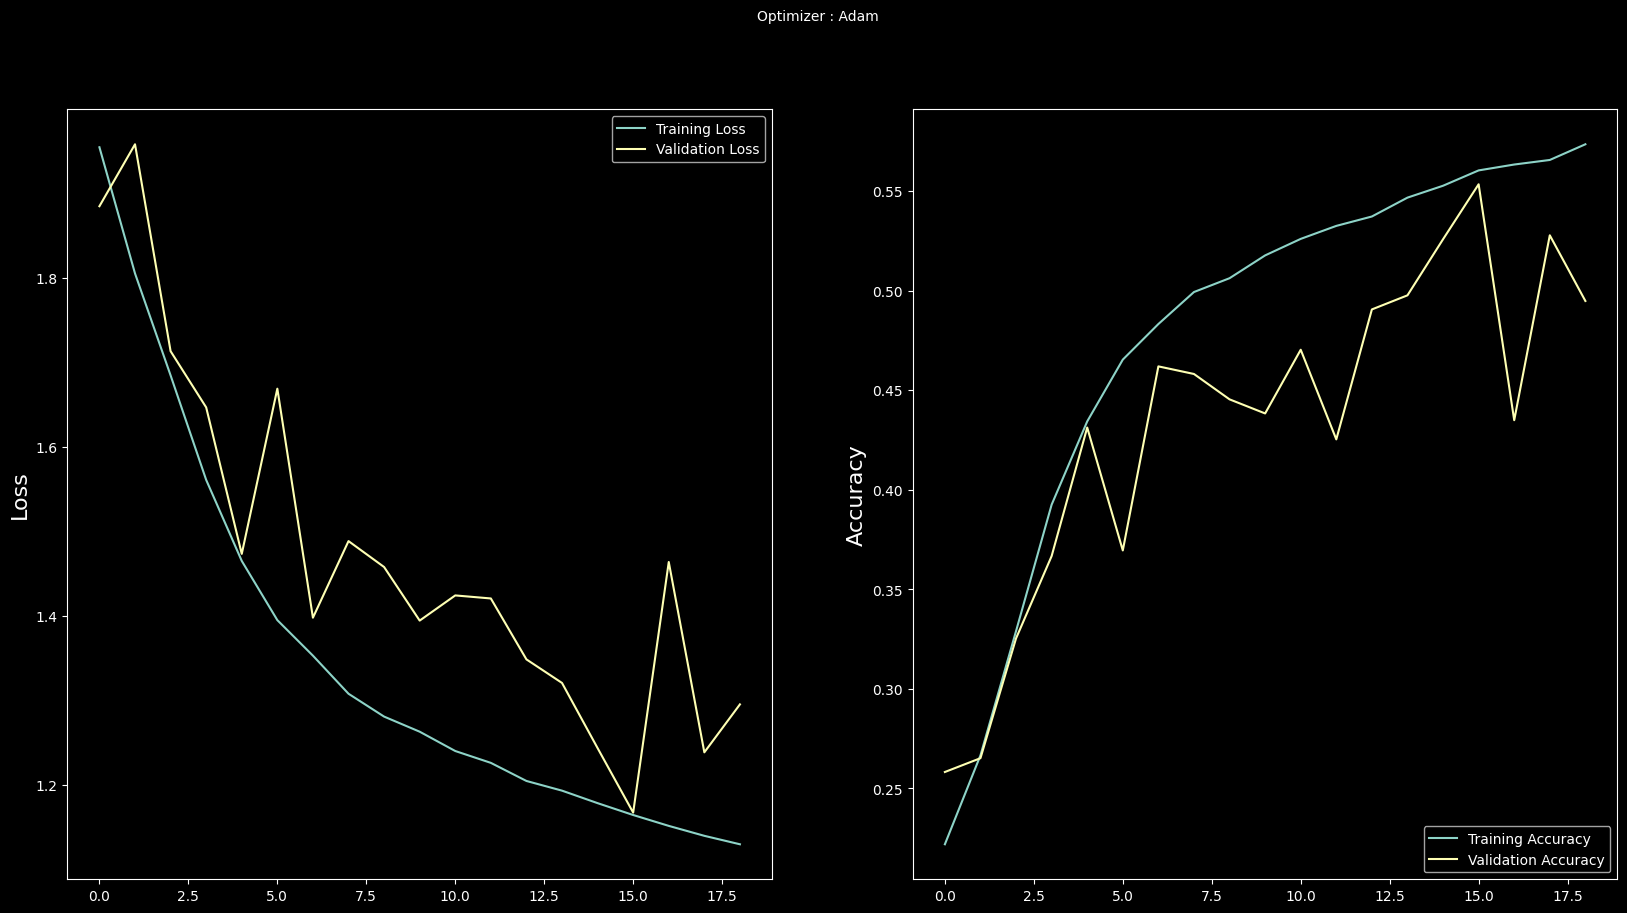

In [21]:
# We take a quick look at the loss and validation loss during the training.
# We can see that they follow each other.
# The validation loss stops decreasing after around 15 epochs, meaning that we have reached the optima.
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()